# Data Analysis Project


# _An Analysis of AirBnB Listings in London_

### Grade: Distinction (85%)

### _Contents_

- [Project Plan](#section-1)
    - [The Data](#section-1-1)
        - [Data Source](#section-1-1-1)
        - [Data Content](#section-1-1-2)
        - [Data Quality](#section-1-1-3)
    - [Project Aims and Objectives](#section-1-2)
        - [Objective 1: Predictors of Price and Review Score](#section-1-2-1)
        - [Objective 2: Mapping the Distributions of Listings](#section-1-2-2)
        - [Objective 3: The Language of Short-Term Rentals](#section-1-2-3)
    - [System Design](#section-1-3)
        - [Architecture](#section-1-3-1)
        - [Processing Modules and Algorithms](#section-1-3-2)
* [Program Code](#section-2)
    - [Importing Packages](#section-2-1)
    - [Data Engineering](#section-2-2)
        - [Raw Data Extraction](#section-2-2-1)
        - [Fixing Boolean Columns](#section-2-2-2)
        - [Fixing Cost Columns](#section-2-2-3)
    - [Data Enhancement](#section-2-3)
        - [Feature Selection](#section-2-3-1)
        - [Distance From Centre](#section-2-3-2)
        - [Price Per Bedroom](#section-2-3-3)
        - [Amenities Count](#section-2-3-4)
        - [Room Type To Entire Property](#section-2-3-5)
    - [Data Analysis](#section-2-4)
        - [Numerical Outliers](#section-2-4-1)
        - [Word Count Outliers](#section-2-4-2)
        - [Borough Aggregation](#section-2-4-3)
    - [Preparing Visualisations](#section-2-5)
        - [Sorted Correlation Heatmaps (Objective 1)](#section-2-5-1)
        - [Mapping with Style (Objective 2)](#section-2-5-2)
        - [Concentric Circles (Objective 2)](#section-2-5-3)
        - [Circle Map (Objective 2)](#section-2-5-4)
        - [Generating Word Clouds (Objective 3)](#section-2-5-5)
- [Project Outcome](#section-3)
    - [Overview of Results](#section-3-1)
    - [Objective 1: Predictors of Price and Review Score](#section-3-2)
        - [Explanation](#section-3-2-1)
        - [Visualisation](#section-3-2-2)
    - [Objective 2: Mapping the Distributions of Listings](#section-3-3)
        - [Explanation](#section-3-3-1)
        - [Visualisation](#section-3-3-2)
    - [Objective 3: The Language of Short-Term Rentals](#section-3-4)
        - [Explanation](#section-3-4-1)
        - [Visualisation](#section-3-4-2)
* [Conclusion and Presentation](#section-4)
    - [Achievements](#section-4-1)
    - [Limitations](#section-4-2)
    - [Future Work](#section-4-)

# <u>Project Plan</u> <a class="anchor" id="section-1"></a>

The popularity of AirBnB has transformed the landscape of short-term rentals, offering travelers accommodation and hosts an opportunity for supplementary income. This data science project delves into the dynamics of AirBnB listings in London.

## The Data <a class="anchor" id="section-1-1"></a>

### Data Source <a class="anchor" id="section-1-1-1"></a>

To identify a suitable dataset for this project, I initially searched through the Kaggle.com data catalogue. There, I discovered that a user had uploaded London AirBnB listing data extracted from the web on November 6, 2023. While this was promising, the static nature of the data presented a potential challenge.

Examining the source information provided by the user I discovered that the London listings data was being web-scraped by a site called ___Inside AirBnB___ on a monthly basis: http://insideairbnb.com/get-the-data.

I've been actively working with the dataset obtained on September 6, 2023. However, my objective for this project is to ensure repeatability. So, one year from now, the code can be re-executed to assess the current state of the market and track its evolution.

### Data Content <a class="anchor" id="section-1-1-2"></a>

There are two datasets from ___Inside AirBnB___ that we are going to use:

___Listings Data___

URL: http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz

This csv contains the all the London listings as at 2023-09-06. I've prepared a dictionary of all the columns and their data types in a code cell below. However, we will only be including a subset of those in our analysis.

In the following table I highlight a few columns that will be the focus of the analysis:

| Column Name | Type | Description |
| --- | --- | --- |
| price | string | The cost per night of the listing |
| neighbourhood_cleansed | string | The London borough in which the listing sits |
| latitude , longitude | float | The exact coordinates of the listing |
| beds | integer |  The number of beds on the listing |
| review_scores_rating | float | The overall rating score from the listing |
| review_scores_* | float | 6 columns breaking down the overall rating |
| description | string | The text entered by the host to describe and market the property |
| amenities | string | Reading this in as a string but it's a list of amenities on a property |
| calculated_host_listings_count | integer | Number of listings owned by the host. Calculated from this dataset |

<br>

___Neighbourhood geojson___

URL: "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson"

This is a geojson file that contains the shapes of each of the 32 London boroughs.

| Column Name | Type | Description |
| --- | --- | --- |
| neighbourhood | string | Name of the Borough |
| neighbourhood_group | string | Always Null |
| geometry | MultiPolygon | The boundary of the borough to be used to draw the outline. |

<br>

_See below the full list of columns and data types._

In [50]:
column_data_types = {
    "id": "int64",
    "listing_url": "string",
    "scrape_id": "int64",
    "last_scraped": "datetime",
    "source": "string",
    "name": "string",
    "description": "string",
    "neighborhood_overview": "string",
    "picture_url": "string",
    "host_id": "int64",
    "host_url": "string",
    "host_name": "string",
    "host_since": "datetime",
    "host_location": "string",
    "host_about": "string",
    "host_response_time": "category",
    "host_response_rate": "string",
    "host_acceptance_rate": "string",
    "host_is_superhost": "string",
    "host_thumbnail_url": "string",
    "host_picture_url": "string",
    "host_neighbourhood": "category",
    "host_listings_count": "float64",
    "host_total_listings_count": "float64",
    "host_verifications": "string",
    "host_has_profile_pic": "string",
    "host_identity_verified": "string",
    "neighbourhood": "category",
    "neighbourhood_cleansed": "category",
    "neighbourhood_group_cleansed": "category",
    "latitude": "float64",
    "longitude": "float64",
    "property_type": "category",
    "room_type": "category",
    "accommodates": "int64",
    "bathrooms": "float64",
    "bathrooms_text": "string",
    "bedrooms": "float64",
    "beds": "float64",
    "amenities": "string",
    "price": "string",
    "minimum_nights": "int64",
    "maximum_nights": "int64",
    "minimum_minimum_nights": "float64",
    "maximum_minimum_nights": "float64",
    "minimum_maximum_nights": "float64",
    "maximum_maximum_nights": "float64",
    "minimum_nights_avg_ntm": "float64",
    "maximum_nights_avg_ntm": "float64",
    "calendar_updated": "string",
    "has_availability": "string",
    "availability_30": "int64",
    "availability_60": "int64",
    "availability_90": "int64",
    "availability_365": "int64",
    "calendar_last_scraped": "datetime",
    "number_of_reviews": "int64",
    "number_of_reviews_ltm": "int64",
    "number_of_reviews_l30d": "int64",
    "first_review": "datetime",
    "last_review": "datetime",
    "review_scores_rating": "float64",
    "review_scores_accuracy": "float64",
    "review_scores_cleanliness": "float64",
    "review_scores_checkin": "float64",
    "review_scores_communication": "float64",
    "review_scores_location": "float64",
    "review_scores_value": "float64",
    "license": "string",
    "instant_bookable": "string",
    "calculated_host_listings_count": "int64",
    "calculated_host_listings_count_entire_homes": "int64",
    "calculated_host_listings_count_private_rooms": "int64",
    "calculated_host_listings_count_shared_rooms": "int64",
    "reviews_per_month": "float64"
    }


### Data Quality <a class="anchor" id="section-1-1-3"></a>

The dataset is of particular interest for this type of project, as it exhibits both positive and negative aspects concerning its quality. In this project, I aim to harness the positive elements while mitigating the impact of the negatives:

___Positives___

- This data is highly comprehensive, well-populated and accurate. In fact, it appears to scrape all available information that can be discovered about a listing when exploring the Airbnb website.

- The source website routinely scrapes the data. If you set up a pipeline to monitor this, you could expand your dataset or keep it updated with each scrape.

- Investigating records within the dataset is easy as a url is provided for each listing. This also increases confidence in the data's reliability, as it's easy to verify correctness on an individual, record-by-record basis.

- The dataset encompasses various types of data to explore, including unstructured text entries, location information, numerical values, and categorical data.

- Many fields, such as host response rate and review scores, are calculated by Airbnb, ensuring their reliability.


___Negatives___

- While the columns I'm interested in are well-populated, some columns in the dataset exhibit high null rates.

- Portions of the dataset rely on user input, which can introduce issues related to data entry errors and outliers.

- Some intriguing property details, like square footage, have been omitted from the dataset.

- The dataset contains redundancies, including numerous columns that won't be used in the analysis. I'll be removing these to reduce noise in the analysis.

## Project Aim and Objectives <a class="anchor" id="section-1-2"></a>

This project seeks to offer a comprehensive analysis of Airbnb listings, providing a holistic view of the short-term rental market in London. My goal is to equip both hosts and travellers with valuable insights, enabling them to make informed decisions in this dynamic marketplace.

The focus will be on two dimensions: Price and Review score. I will start with a general numerical analysis of factors influencing these dimensions and then dive deeper into the geographical and linguistic factors, using vivid and interesting visualisations to bring the data to life.

#### _Objective 1: Numerical Predictors of Price and Review Score_ <a class="anchor" id="section-1-2-1"></a>

This objective sets the foundation for our analyses. Using statistical techniques and feature selection I aim to reveal how Price and Review Score correlates with a range of features generated from the data.

**Desired Output:** Heatmaps displaying the correllation of the dataset features with price and review score.

#### Objective 2: _Mapping the Distributions of Listings_ <a class="anchor" id="section-1-2-2"></a>

Utilising mapping and visualization, I will analyse the distribution of listings, discerning patterns in pricing and review scores across London. These insights will guide travelers and hosts in choosing the most suitable locations and properties.

**Desired Output:** Visualisations showing the difference in density, price and review scores across London boroughs and how these factors change as you move away from the centre.

#### Objective 3: _The Language of Short-Term Rentals_ <a class="anchor" id="section-1-2-3"></a>

Building upon our analysis of pricing and review scores, I explore linguistic strategies employed in marketing Airbnb listings. This objective aims to uncover the language in listings associated with high and low review scores, as well as those used to promote more expensive properties vs cheaper ones.

**Desired Output:** Word clouds categorised by price and review score demonstrating the language that correlates with those factors.

## System Design <a class="anchor" id="section-1-3"></a>

### Architecture <a class="anchor" id="section-1-3-1"></a>

The system design will be a common industry standard. 

1. Starting with a Data Engineering ELT (Extract Load Transform) pipeline. Not to be confused with ETL, the idea is we load in a raw cut of the dataset then once we have it stored in our machine we can do transformations. The transformations at this stage will just be simple data fixes and cleaning of values. 

2. Then I will move on to enhancement, using the existing features of our dataset to uncover more features to be used in our analyses.

3. Next an Analysis piece where any outliers will be handled along with null values or anomalies. Here we will also aggregate and combine our two datasets ready for visualisation.

4. Finally I will prepare the visualisations. 

![image.png](architechture.png)

### Processing Modules and Algorithms <a class="anchor" id="section-1-3-2"></a>

The most significant tools I will be using throughout this project are as follows:

* pandas read and write functionality to capture and store the source data.
* Using DataFrame loc to conditionally slice a DataFrame, adjust values or remove outliers.
* The haversine formula, used to compute distance between two points on a globe.
* Aggregations such as count and mean across boroughs and merging with the borough dataset to map the resulting values.
* Lambda functions used to apply a small function to a whole Dataframe.
* HTML alignment used to have more control over the position and size of visualisations.

<br>

# <u>Program Code</u>  <a class="anchor" id="section-2"></a>

#### _Importing Packages_ <a class="anchor" id="section-2-1"></a>

It is standard practice to import packages at the top of your code to show what dependencies are required to run the file.

A couple of the packages we are going to import do not come as standard with Anaconda so I have provided a code snippet to pip install here.

In [51]:
%pip install geopandas
%pip install folium
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


I have provided some more detail about the use of each package.

In [52]:
# General purpose data analysis libraries.
import pandas as pd
import numpy as np
import math
import functools

# For statistical and numerical plotting (Objective 1)
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting maps and handling spacial data (Objective 2)
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster
import geopandas

# Used to generate Word Clouds and handle text data (Objective 3)
import string
from collections import Counter
from wordcloud import WordCloud

# Used to have more control when displaying visualisations 
from IPython.display import HTML

As a preference I set the max_columns option so that I can scroll across all the columns without them being truncated.

In [53]:
pd.options.display.max_columns = 500

<br>

## Data Engineering <a class="anchor" id="section-2-2"></a>

#### _Raw Data Extraction_ <a class="anchor" id="section-2-2-1"></a>

The goal for this section is to connect to our data source, pull in the required data and store a copy in our local files.

With the column_data_types dictionary I produced during my initial analysis I can read in the raw dataset. However there is a small change I would like to make to separate out date columns. This will allow me to pass the dictionary in as an argument and a list of date columns in as another parse_dates argument. 

In [54]:
print(f"Column Type Dict Length: {len(column_data_types)}")

date_columns = []
for col, dtype in column_data_types.items():
    if dtype == "datetime":
        date_columns.append(col)

for column in date_columns:
    column_data_types.pop(column)

print(f"New Column Type Dict Length: {len(column_data_types)}")
print(f"Date Column List Length: {len(date_columns)}")

Column Type Dict Length: 75
New Column Type Dict Length: 70
Date Column List Length: 5


Now we have these separated we can now use pandas to extract the data from the source in the data directory. This code cell uses the url of the csv so that this is repeatable.

In [55]:
raw_df = pd.read_csv(
    "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz", 
    dtype=column_data_types, 
    parse_dates=date_columns
    )

print(f"DataFrame Shape: {raw_df.shape}")

DataFrame Shape: (87946, 75)


Now we have the data loaded with the expected number of records we can store it in a file. I am going to use parquet as storing in csv format can cause issues with our data types.

In [56]:
raw_df.to_parquet("listings.parquet")

I will do the same with the boroughs.geojson file.

In [57]:
boroughs = geopandas.read_file("http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/neighbourhoods.geojson")
boroughs.to_file("boroughs.geojson", driver='GeoJSON')

So the E and L of the data pipeline is complete with the desired result. We can connect to the source and pull the two datasets into files on our machine. In a more scaled up approach this might into an S3 Bucket or database but this is fine for our project. 

Now we have a repeatable way of loading our 2 key datasets into our file with the following code.

In [58]:
listings_df = pd.read_parquet("listings.parquet")
boroughs_geo = geopandas.read_file("boroughs.geojson")

print(f"Listings Shape: {listings_df.shape}")
print(f"Boroughs Shape: {boroughs_geo.shape}")

Listings Shape: (87946, 75)
Boroughs Shape: (33, 3)


<br>

#### _Fixing Boolean Columns_ <a class="anchor" id="section-2-2-2"></a>

This section will fix an issue with in this dataset with columns that should be Boolean being set to "t" and "f" rather than True or False.

In [59]:
bool_columns = [
    'instant_bookable',
    'has_availability',
    'host_has_profile_pic',
    'host_identity_verified',
    'host_is_superhost'
]
display(listings_df[bool_columns].head())

,instant_bookable,has_availability,host_has_profile_pic,host_identity_verified,host_is_superhost
0,t,t,t,t,f
1,f,t,t,t,f
2,f,t,t,t,f
3,f,t,t,t,f
4,f,t,t,t,t


See how the True and False values are stored as t and f in the dataset. This is understood as a string by Pandas which doesn't reflect the underlying value in the listing.

The aim is to change these values to 1 or 0 and cast as a float which will allow them to be used for correlation later on.

In [60]:
for col in bool_columns:
    listings_df.loc[listings_df[col] == "t", col] = "1"
    listings_df.loc[listings_df[col] == "f", col] = "0"
    listings_df[col] = listings_df[col].astype(float)
display(listings_df[bool_columns].head())
print(f"Listings Shape: {listings_df.shape}")

,instant_bookable,has_availability,host_has_profile_pic,host_identity_verified,host_is_superhost
0,1.0,1.0,1.0,1.0,0.0
1,0.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,1.0,1.0,1.0


Listings Shape: (87946, 75)


See how now t has become 1.0 and f has become 0.0 which has resolved this data issue. 

#### _Fixing Cost Columns_ <a class="anchor" id="section-2-2-3"></a>

Next we will look at an issue with the price column. We are looking at it as a list to make it easy to add future columns if they appear in the dataset. 

In [61]:
cost_columns = [
    "price"
]
display(listings_df[cost_columns+["listing_url"]].head(5))

,price,listing_url
0,$42.00,https://www.airbnb.com/rooms/92644
1,$175.00,https://www.airbnb.com/rooms/93015
2,$79.00,https://www.airbnb.com/rooms/13913
3,$150.00,https://www.airbnb.com/rooms/15400
4,$46.00,https://www.airbnb.com/rooms/93734


Printing out this column we see that the issue is that the values contain $ and , characters inside the cost which is preventing them from being cast as float values and therefore preventing any numerical analysis. 

This is also an issue due to the currency symbol being incorrect. If you check these listings for example index 0 has a price per night of £42 and hour not $42. 

In [62]:
for col in cost_columns:
    listings_df[col] = listings_df[col].str.replace("\$|,", "", regex=True)
    listings_df[col] = listings_df[col].astype(float)
display(listings_df[cost_columns+["listing_url"]].head(5))

,price,listing_url
0,42.0,https://www.airbnb.com/rooms/92644
1,175.0,https://www.airbnb.com/rooms/93015
2,79.0,https://www.airbnb.com/rooms/13913
3,150.0,https://www.airbnb.com/rooms/15400
4,46.0,https://www.airbnb.com/rooms/93734


Replacing and recasting has fixed this issue. Now price is a numerical value that we can analyse as such.

<br>

## Data Enhancement <a class="anchor" id="section-2-3"></a>

#### _Feature Selection_ <a class="anchor" id="section-2-3-1"></a>

Due to the breadth of this dataset there are many columns which will not be of use during this project. To reduce the noise in the dataset I will specify in a list the columns that I will use and leave the remaining ones out. However, if the requirement come later down the line to use these columns they can easily be added here.

In [63]:
select_columns = [
    # "id",
    "listing_url",
    # "scrape_id",
    # "source",
    "name",
    "description",
    # "neighborhood_overview",
    # "picture_url",
    # "host_id",
    # "host_url",
    # "host_name",
    # "host_location",
    # "host_about",
    "host_response_time",
    "host_response_rate",
    "host_acceptance_rate",
    "host_is_superhost",
    # "host_thumbnail_url",
    # "host_picture_url",
    # "host_neighbourhood",
    # "host_listings_count",
    "host_total_listings_count",
    # "host_verifications",
    "host_has_profile_pic",
    "host_identity_verified",
    # "neighbourhood",
    "neighbourhood_cleansed",
    # "neighbourhood_group_cleansed",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    # "accommodates",
    # "bathrooms",
    "bathrooms_text",
    # "bedrooms",
    "beds",
    "amenities",
    "price",
    # "minimum_nights",
    # "maximum_nights",
    # "minimum_minimum_nights",
    # "maximum_minimum_nights",
    # "minimum_maximum_nights",
    # "maximum_maximum_nights",
    # "minimum_nights_avg_ntm",
    # "maximum_nights_avg_ntm",
    # "calendar_updated",
    # "has_availability",
    # "availability_30",
    # "availability_60",
    # "availability_90",
    # "availability_365",
    "number_of_reviews",
    "number_of_reviews_ltm",
    # "number_of_reviews_l30d",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    # "license",
    "instant_bookable",
    "calculated_host_listings_count",
    # "calculated_host_listings_count_entire_homes",
    # "calculated_host_listings_count_private_rooms",
    # "calculated_host_listings_count_shared_rooms",
    "reviews_per_month"
]
listings_df = listings_df[select_columns]
listings_df.head()

,listing_url,name,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,beds,amenities,price,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,NaN,<NA>,100%,0.0,1.0,1.0,1.0,Wandsworth,51.44201,-0.18739,Private room in rental unit,Private room,1.5 shared baths,2.0,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",42.0,216,9,4.57,4.74,4.86,4.71,4.67,4.53,4.68,1.0,1,1.45
1,https://www.airbnb.com/rooms/93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,within a few hours,100%,25%,0.0,2.0,1.0,1.0,Hammersmith and Fulham,51.49993,-0.21707,Entire rental unit,Entire home/apt,1 bath,3.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.0,38,2,4.82,4.76,4.62,4.85,4.88,4.85,4.74,0.0,1,0.27
2,https://www.airbnb.com/rooms/13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,within a few hours,100%,88%,0.0,4.0,1.0,1.0,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1 shared bath,1.0,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",79.0,41,11,4.80,4.72,4.72,4.74,4.82,4.69,4.69,0.0,2,0.26
3,https://www.airbnb.com/rooms/15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,within a day,100%,41%,0.0,12.0,1.0,1.0,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,1 bath,1.0,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.0,94,5,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.0,1,0.56
4,https://www.airbnb.com/rooms/93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,within a few hours,90%,75%,1.0,1.0,1.0,1.0,Greenwich,51.47618,0.01442,Private room in condo,Private room,1 shared bath,1.0,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.0,180,25,4.62,4.70,4.59,4.63,4.81,4.64,4.67,0.0,1,1.21


With this feature set as a baseline we can now start to think about enhancement.

<br>

#### _Distance From the Centre_ <a class="anchor" id="section-2-3-2"></a>

The Listings DataFrame contains coordinates for each listing.

In [64]:
listings_df[["listing_url", "latitude", "longitude"]].head(5)

,listing_url,latitude,longitude
0,https://www.airbnb.com/rooms/92644,51.44201,-0.18739
1,https://www.airbnb.com/rooms/93015,51.49993,-0.21707
2,https://www.airbnb.com/rooms/13913,51.56861,-0.11270
3,https://www.airbnb.com/rooms/15400,51.48780,-0.16813
4,https://www.airbnb.com/rooms/93734,51.47618,0.01442


This information is useful on it's own but it would be good to have a single datapoint that measures how close the listing is to the centre of London. This means we need to choose a centre point. This is a question with seemingly no right answer but after doing research I found this article which gave coordinates of the exact centre of London based on geographic measurements:

https://www.standard.co.uk/news/london/london-s-real-centre-point-is-next-to-bench-on-the-victoria-embankment-by-the-thames-9381800.html

The article gives these coordinates: 51°30’37.6”N 0°06’56.3”W

<iframe src="https://www.google.com/maps/embed?pb=!1m17!1m12!1m3!1d2483.151070786313!2d-0.11821918763198132!3d51.51044437169647!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m2!1m1!2zNTHCsDMwJzM3LjYiTiAwwrAwNic1Ni4zIlc!5e0!3m2!1sen!2suk!4v1695904951512!5m2!1sen!2suk" width="400" height="300" style="border:0;" allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>

Google Maps has a converter from these northing-westing coordinates to latitude-longitude. We can use this to get the location for the centre of London that we can use throughout our analysis. 

The lat-long given by Google is 51.510444, -0.115639

In [65]:
CENTRE_OF_LONDON = (51.510444, -0.115639)

Now we have a central location to measure from we need to write a function that can compute the distance between two coordinate points. 

Since we are dealing with a globe our calculations would be out if we did a simple pythagorean formula; even though it is over a small region. So, we need to calculate the distance between two points on a globe which requires the haversine formula:

- https://www.educative.io/answers/how-to-calculate-distance-using-the-haversine-formula

Here is my basic implementaion below:

In [66]:
def haversine(point_a, point_b):
    # Unpacking Lat and Longs
    lat_a, lon_a = point_a
    lat_b, lon_b = point_b
    R = 6371  # radius of earth in km
    lat_delta = math.radians(lat_b - lat_a)
    lon_delta = math.radians(lon_b - lon_a)
    a = (math.sin(lat_delta / 2) ** 2) + math.cos(math.radians(lat_a)) * math.cos(math.radians(lat_b)) * math.sin(lon_delta / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c  # distance in km

We can apply this function to our full dataset to compare the distance of each listing to the centre. 

In [67]:
listings_df["distance_from_centre_km"] = listings_df[["latitude", "longitude"]].apply(
    lambda row: haversine(CENTRE_OF_LONDON, (row['latitude'], row['longitude'])), 
    axis=1
)
listings_df[["listing_url", "latitude", "longitude", "distance_from_centre_km"]].head()

,listing_url,latitude,longitude,distance_from_centre_km
0,https://www.airbnb.com/rooms/92644,51.44201,-0.18739,9.088339
1,https://www.airbnb.com/rooms/93015,51.49993,-0.21707,7.116982
2,https://www.airbnb.com/rooms/13913,51.56861,-0.11270,6.470957
3,https://www.airbnb.com/rooms/15400,51.48780,-0.16813,4.420666
4,https://www.airbnb.com/rooms/93734,51.47618,0.01442,9.776970


One more interesting thing to add would be distance from centre on the North/South axis and East/West axis. For our purposes, having these in radians is fine as we will only be using them for correlations as opposed to precise mapping.

In [68]:
listings_df["distance_from_centre_N"] = listings_df["latitude"] - CENTRE_OF_LONDON[0]
listings_df["distance_from_centre_S"] = CENTRE_OF_LONDON[0] - listings_df["latitude"]
listings_df["distance_from_centre_E"] = listings_df["longitude"] - CENTRE_OF_LONDON[1]
listings_df["distance_from_centre_W"] = CENTRE_OF_LONDON[1] - listings_df["longitude"]

compass_differences = ["distance_from_centre_N", "distance_from_centre_S", "distance_from_centre_E", "distance_from_centre_W"]

for col in compass_differences:
    listings_df.loc[listings_df[col] < 0, col] = np.NaN
    listings_df[col].astype(float).apply(math.radians)

We have now added 5 more features to our dataset which will give us more ways to analyse the listings based on their location.

<br>

#### _Price Per Bedroom_ <a class="anchor" id="section-2-3-3"></a>

An AirBnB listing displays the price for renting per night and this is reflected in our dataset. This is misleading as there might be one property with a single bedroom that costs the same as a property with 10 bedrooms. The current price column would suggest that these properties were equivalent but that would realistically be covering up the fact that one could house many more guests. 

Thus, I will create a new price_per_bed column to create a price feature that is less dependant on number of beds.

In [69]:
listings_df["price_per_bed"] = listings_df["price"]/listings_df["beds"]
listings_df[["price_per_bed", "price", "beds"]].head()

,price_per_bed,price,beds
0,21.000000,42.0,2.0
1,58.333333,175.0,3.0
2,79.000000,79.0,1.0
3,150.000000,150.0,1.0
4,46.000000,46.0,1.0


Now we have a price per night per bed metric which will give a better representation of the price of a listing.

#### _Amenities Count_ <a class="anchor" id="section-2-3-4"></a>

At the moment the amenities column is hard to gain any meaningful insights from as it's just a list of the names of the amenities on the listing. We can use string splitting to give us another numerical column with the number of listings that can be used for the correlation heatmap. 

In [70]:
listings_df["amenities_count"] = listings_df["amenities"].apply(lambda x: len(list(x.split(", "))))

pd.options.display.max_colwidth = 300
display(listings_df[["listing_url", "amenities", "amenities_count"]].head())
pd.reset_option('display.max_colwidth')

,listing_url,amenities,amenities_count
0,https://www.airbnb.com/rooms/92644,"[""Heating"", ""TV with standard cable"", ""Wifi"", ""Smoke alarm"", ""Dryer"", ""Kitchen"", ""Washer"", ""Essentials""]",8
1,https://www.airbnb.com/rooms/93015,"[""Window guards"", ""Bathtub"", ""Hot water kettle"", ""Laundromat nearby"", ""Indoor fireplace"", ""Microwave"", ""Coffee maker"", ""Self check-in"", ""Dining table"", ""Bed linens"", ""Books and reading material"", ""Cleaning available during stay"", ""Clothing storage: closet and dresser"", ""Coffee"", ""Hot water"", ""Ir...",48
2,https://www.airbnb.com/rooms/13913,"[""Bathtub"", ""Hot water kettle"", ""Laundromat nearby"", ""Private patio or balcony"", ""Paid street parking off premises"", ""Shampoo"", ""Free washer \u2013 In unit"", ""Luggage dropoff allowed"", ""Coffee maker"", ""Self check-in"", ""Dining table"", ""Bed linens"", ""Books and reading material"", ""Blender"", ""Coffee...",55
3,https://www.airbnb.com/rooms/15400,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer"", ""Microwave"", ""Coffee maker"", ""Hot water"", ""Iron"", ""Host greets you"", ""Washer"", ""Fire extinguisher"", ""Cooking basics"", ""Heating"", ""TV with standard cable"", ""Refrigerator"", ""Hair dryer"", ""Essentials"", ""Long term stays allowed"", ""Carbon monoxide alarm...",25
4,https://www.airbnb.com/rooms/93734,"[""Window guards"", ""Bathtub"", ""Hot water kettle"", ""Laundromat nearby"", ""Free driveway parking on premises \u2013 2 spaces"", ""Private patio or balcony"", ""Free washer \u2013 In unit"", ""Whirlpool stainless steel gas stove"", ""Luggage dropoff allowed"", ""Microwave"", ""Bed linens"", ""Clothing storage: clo...",46


#### _Room Type to Entire Property_ <a class="anchor" id="section-2-3-5"></a>

Doing some further checks on room type can allow us to infer another boolean field: Whether the listing is for the entire property or not.

In [71]:
listings_df["room_type"].value_counts()

Entire home/apt    54575
Private room       32711
Shared room          441
Hotel room           219
Name: room_type, dtype: int64

Examining these room types it's easy to see that a Property is either an Entire Property or some type of single room, either a room, shared room or hotel room. It will be interesting to turn this into a numerical representation.

In [72]:
listings_df.loc[listings_df["room_type"] ==  "Entire home/apt", "entire_property"] = 1.0
listings_df["entire_property"] = listings_df["entire_property"].fillna(0.0)
listings_df[["listing_url", "entire_property"]].head()

,listing_url,entire_property
0,https://www.airbnb.com/rooms/92644,0.0
1,https://www.airbnb.com/rooms/93015,1.0
2,https://www.airbnb.com/rooms/13913,0.0
3,https://www.airbnb.com/rooms/15400,1.0
4,https://www.airbnb.com/rooms/93734,0.0


Now we have a boolean field that tells us if a listing is for a full property or just a single room. 

<br>

## Data Analysis <a class="anchor" id="section-2-4"></a>

#### _Numerical Outliers_ <a class="anchor" id="section-2-4-1"></a>

For AirBnB listings there are three main buckets of values:

1. AirBnB calculated values such as: host response time, response rate and review_scores
2. User selected value such as: location which you would choose on a map or property type where you might 
select from a list. 
3. User input data such as: number of beds and price

The third category is by far the most ripe for miss-entered data so those fields will be the focus of our outlier investigation.


In [73]:
listings_df[["price_per_bed", "beds"]].describe()

,price_per_bed,beds
count,86812.000000,86812.000000
mean,112.076350,1.803771
std,404.725954,1.276012
min,0.000000,1.000000
25%,46.333333,1.000000
50%,71.000000,1.000000
75%,112.000000,2.000000
max,80100.000000,50.000000


Looking at the max compared to the upper quartile (75%) there are clearly some huge outliers for both metrics. I'm now going to assign these the mean and standard deviation for both values to variables to use for plotting and removal of outliers.

In [74]:
price_std = listings_df["price_per_bed"].std()
price_mean = listings_df["price_per_bed"].mean()

beds_std = listings_df["beds"].std()
beds_mean = listings_df["beds"].mean()

Next, since I plan on plotting these values a few times, I will write a general function that will build a scatter plot of the given dataframe, column, standard deviation and mean. It will also draw lines for the mean and then one for each number of standard deviations above the mean provided in a list (defaulted to just drawing 1 line for 2 std above the mean).

In [75]:
def scatter_plot_for_outliers(df, column, mean, std, stds_above_mean=[2]):
    plt.scatter(df.index, df[column], c="lightblue", marker="o", label="Data Points")
    plt.axhline(mean, color="red", linestyle="dashed", label="Mean")
    for x in stds_above_mean:
        plt.axhline(mean + x * std, color="darkgreen", linestyle="dashed", label=f"Mean + {x} Std Dev")
    plt.title(f"Scatter Plot of {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()

Now we can make use of this function to plot the values of price_per_bed and number of beds.

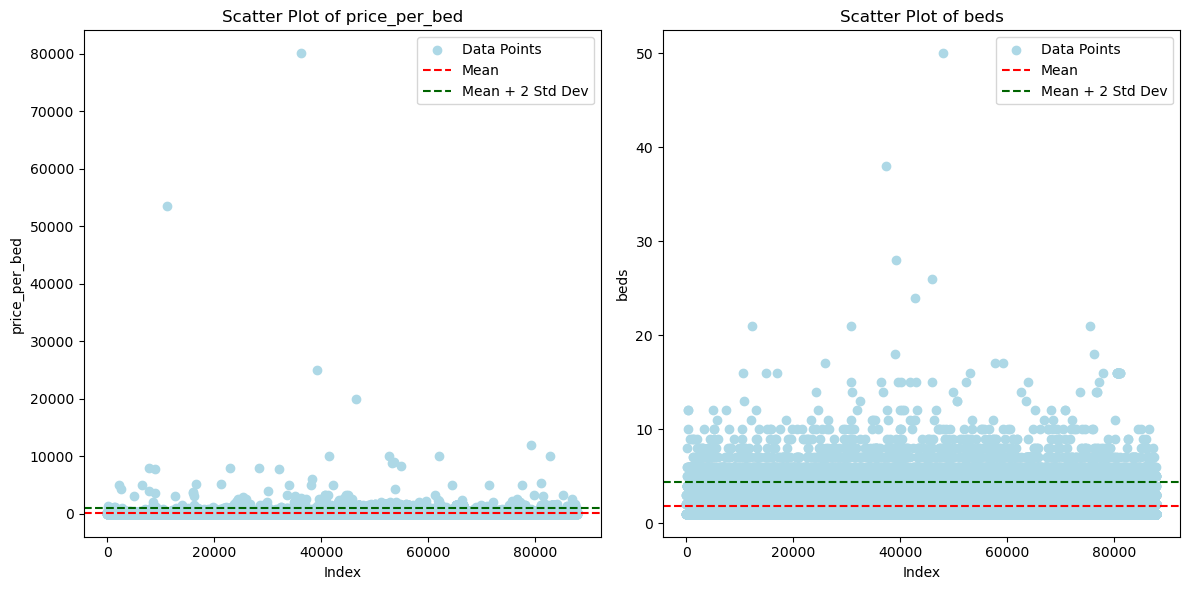

In [76]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter_plot_for_outliers(listings_df, "price_per_bed", price_mean, price_std)

plt.subplot(1, 2, 2)
scatter_plot_for_outliers(listings_df, "beds", beds_mean, beds_std)

plt.tight_layout()
plt.show()

Looking at this price_per_bed is very hard to read due to huge outliers at the 80k mark and 50k mark. I will adjust the dataframe to view it more clearly by removing anything 10 standard deviations above the mean. 

Also for both beds and price I would like to show a few more standard deviations above the mean to see where a reasonable cut-off should be.

In [77]:
listings_df_no_price_outliers = listings_df[listings_df["price_per_bed"] < (price_mean + 10*price_std)][["listing_url", "price_per_bed"]]
listings_df_no_beds_outliers = listings_df[listings_df["beds"] < (beds_mean + 10*beds_std)][["listing_url", "beds"]]

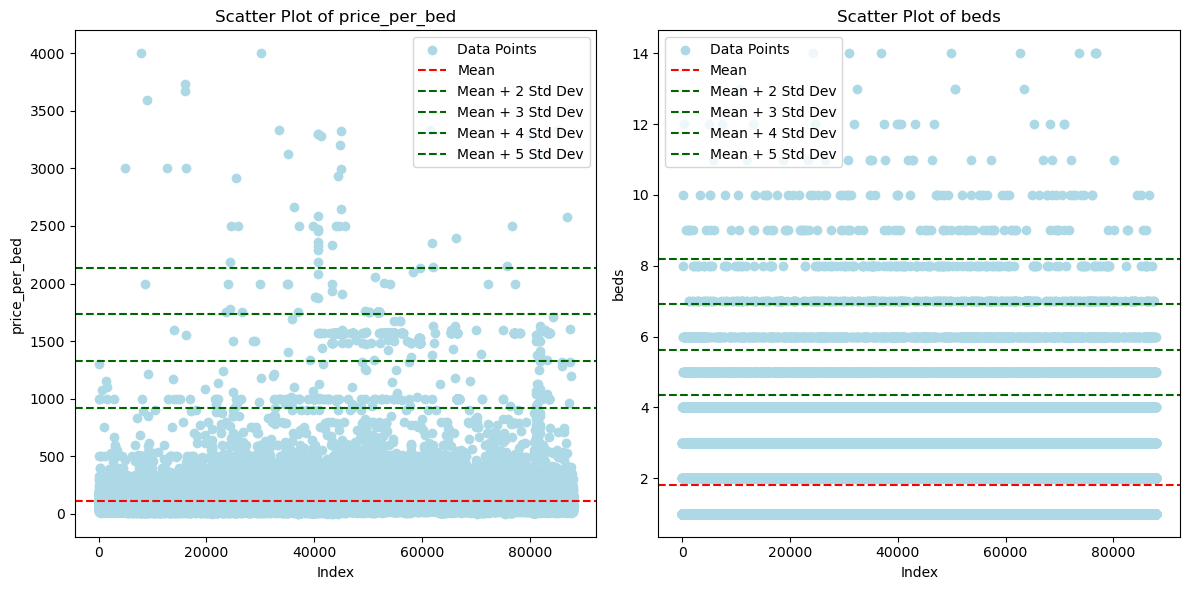

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter_plot_for_outliers(listings_df_no_price_outliers, "price_per_bed", price_mean, price_std, stds_above_mean=[2, 3, 4, 5])

plt.subplot(1, 2, 2)
scatter_plot_for_outliers(listings_df_no_beds_outliers, "beds", beds_mean, beds_std, stds_above_mean=[2, 3, 4, 5])

plt.tight_layout()
plt.show()

Reviewing the above I think that the price_per_bed metric can be filtered by 2 standard deviations above the mean. For beds it is tricky due to the discrete nature of the distribution but based on this analysis I don't think it's unreasonable to remove records that are outside of 3 standard deviations above the mean. 

Note since the distribution has no outliers below the mean I'm only looking at extremes on one tail.

In [79]:
listings_df = listings_df[(listings_df["beds"] <= (beds_mean + 3*beds_std)) & (listings_df["price"] < (price_mean + 2*price_std))]
listings_df[["price_per_bed", "beds"]].describe()

,price_per_bed,beds
count,83519.000000,83519.000000
mean,89.468121,1.698117
std,70.091082,0.978269
min,0.000000,1.000000
25%,46.333333,1.000000
50%,70.000000,1.000000
75%,109.000000,2.000000
max,916.000000,5.000000


Looking at the new values in the dataframe I am happy with the removal of outliers. Anything over £916 per bed per night I would view as an outlier and anything in London over 5 beds seems like it would also be a big outlier. I even think this is being conservative with the value we are willing to remove.

Now these values are removed we can continue with our analysis.

#### _Word Count Outliers_ <a class="anchor" id="section-2-4-2"></a>

Our third objective is to create word clouds that demonstrate how descriptions change across properties

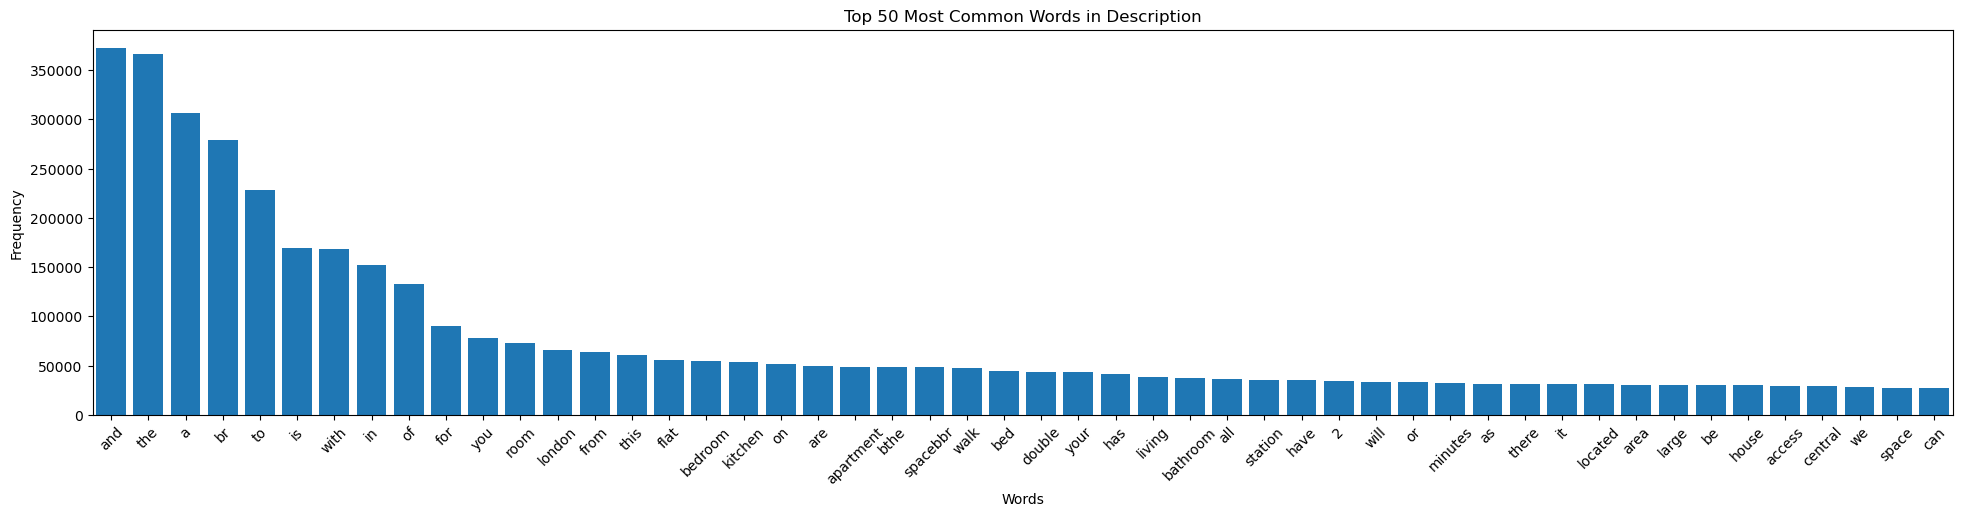

In [80]:
all_descriptions = " ".join(listings_df["description"].fillna(""))

translator = str.maketrans("", "", string.punctuation)
all_descriptions = all_descriptions.lower()
all_descriptions = all_descriptions.translate(translator)

words = all_descriptions.split()

word_counts = Counter(words)
top_words = word_counts.most_common(50)
top_words, counts = zip(*top_words)

plt.figure(figsize=(24, 5))
plt.bar(top_words, counts)
plt.title("Top 50 Most Common Words in Description")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.xlim(-0.5, len(top_words) - 0.5)
plt.show()

Seeing this visualisation it is clear that there are actually no huge outliers. The only outliers are the most frequently used words in English such as and, of, the, a, etc. 

The WordCount packaged filters these out anyway so nothing much we can do here.

The only unusual part of this data is the "br" word that is in the descriptions as a line break character. I will remove this when it comes time to create the word clouds.

<br>

#### _Borough Aggregation_ <a class="anchor" id="section-2-4-3"></a>

With a clean dataset and plenty of numerical values to aggregate by, it's time to bring in the borough geopandas dataset.

In [81]:
boroughs_geo = geopandas.read_file("boroughs.geojson")
boroughs_geo.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,NaN,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51..."
1,Croydon,NaN,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51..."
2,Bromley,NaN,"MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2..."
3,Hounslow,NaN,"MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51..."
4,Ealing,NaN,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51..."


We can enhance this dataset by preparing various aggregations from the listings_df. 

I am going to add the following:
- Total listing count per borough
- Average listing price per borough
- Average listing review per borough

These can be used for displaying in our visualisations.

Starting with count.

In [82]:
counts = listings_df["neighbourhood_cleansed"].value_counts().reset_index()
counts = counts.rename(columns={"neighbourhood_cleansed": "listing_count", "index": "neighbourhood"})
boroughs_geo = boroughs_geo.merge(counts, how="left", on="neighbourhood")
boroughs_geo.head()

,neighbourhood,neighbourhood_group,geometry,listing_count
0,Kingston upon Thames,NaN,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...",672
1,Croydon,NaN,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...",1442
2,Bromley,NaN,"MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...",741
3,Hounslow,NaN,"MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...",1156
4,Ealing,NaN,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...",2074


Average Price

In [83]:
grouped_mean_price = listings_df[["neighbourhood_cleansed", "price_per_bed"]].groupby("neighbourhood_cleansed").mean().reset_index()
grouped_mean_price = grouped_mean_price.rename(columns={"neighbourhood_cleansed": "neighbourhood", "price_per_bed": "avg_price_per_bed"})
boroughs_geo = boroughs_geo.merge(grouped_mean_price, how="left", on="neighbourhood")
boroughs_geo.head()

,neighbourhood,neighbourhood_group,geometry,listing_count,avg_price_per_bed
0,Kingston upon Thames,NaN,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...",672,64.704737
1,Croydon,NaN,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...",1442,58.159963
2,Bromley,NaN,"MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...",741,59.566779
3,Hounslow,NaN,"MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...",1156,74.583117
4,Ealing,NaN,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...",2074,69.409105


Average Review Score

In [84]:
grouped_mean_rating = listings_df[["neighbourhood_cleansed", "review_scores_rating"]].groupby("neighbourhood_cleansed").mean().reset_index()
grouped_mean_rating = grouped_mean_rating.rename(columns={"neighbourhood_cleansed": "neighbourhood", "review_scores_rating": "avg_review_score_rating"})
boroughs_geo = boroughs_geo.merge(grouped_mean_rating, how="left", on="neighbourhood")
boroughs_geo.head()

,neighbourhood,neighbourhood_group,geometry,listing_count,avg_price_per_bed,avg_review_score_rating
0,Kingston upon Thames,NaN,"MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...",672,64.704737,4.731306
1,Croydon,NaN,"MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...",1442,58.159963,4.575608
2,Bromley,NaN,"MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...",741,59.566779,4.689755
3,Hounslow,NaN,"MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...",1156,74.583117,4.550332
4,Ealing,NaN,"MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...",2074,69.409105,4.605850


As demonstrated with the above Dataframe we now have the following aggregations for each borough: 
- Count of the listings in the borough
- The average price per bed in that borough
- The average overall review score in that borough

## Preparing Visualisations <a class="anchor" id="section-2-5"></a>

In this section I will build the functions that we will call in the Visualisation section of the project. At the end of this function we will have:
- A function that produces sorted heatmaps for numerical factors and their correlation with price and review score.
- A function that produces a map of London with the borough outlines and a colour gradient demonstrating the aggregation scores of count, price and rating.
- A function that draws concentric circles on a map of London showing how changes occur as you move away from the centre.
- A function that creates a word cloud given a Dataframe and a text column.

#### _Sorted Correlation Heatmaps (Objective 1)_ <a class="anchor" id="section-2-5-1"></a>

For our first visualisation we need a function that creates the desired heatmaps.

In [85]:
def sorted_correlation_heatmap(input_df, column):
    df = input_df.corr(numeric_only=True)[[column]].sort_values(column)
    return df.style.background_gradient(cmap='coolwarm')

Also, I would like to display them side by side so some HTML magic is required. 

In [86]:
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 4em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

#### _Mapping with Style (Objective 2)_ <a class="anchor" id="section-2-5-2"></a>

In order to correctly display the boroughs on a map, in a way that is visually insightful. I need to create a style function for each.

In [87]:
def style_fn(feature, parameters):
    column = parameters["column"]
    fill_colour = parameters["fill"]
    if feature["properties"][column]:
        if feature["properties"][column] >= boroughs_geo[column].quantile(0.9):
            opacity = 0.9
        elif feature["properties"][column] >= boroughs_geo[column].quantile(0.7):
            opacity = 0.7
        elif feature["properties"][column] > boroughs_geo[column].quantile(0.5):
            opacity = 0.5
        elif feature["properties"][column] > boroughs_geo[column].quantile(0.3):
            opacity = 0.3
        else:
            opacity = 0.1
    else:
        fill_colour = "grey"
        opacity = 0.5

    ss = {
        "fillColor": fill_colour,
        "fillOpacity": opacity,
        "weight": 0.8,
        "color": "white"
    }
    return ss

The function will take the aggregated column (e.g. listings_count) as an input and set the opacity of the fill for that borough. Resulting in boroughs with a higher density of properties showing with a stronger colour.

Now we need a way to display this. So, I will write a function that produces a map from the provided aggregation column and borough that uses the style function.

In [88]:
def map_borough_aggregation_column(column, fill_colour):
    map = folium.Map(location=CENTRE_OF_LONDON, zoom_start=10)
    style_fn_column = functools.partial(style_fn, parameters={"column": column, "fill": fill_colour})

    folium.GeoJson(
        data=boroughs_geo,
        style_function=style_fn_column,
        tooltip=folium.features.GeoJsonTooltip(["neighbourhood", column]),
    ).add_to(map)
    return map

This function should now allow us to create a visualisation of the boroughs across London for one of the aggregation columns I created in the Analysis section. We will call this once for each of count, price average and review score average.

#### _Concentric Circles (Objective 2)_ <a class="anchor" id="section-2-5-3"></a>

The distance metric we have created in the Data Enhancement section can be used to bring the data to life in a plot. However, creating a vivid picture of the data is an interesting challenge. 

The first instinct would be to create radial bands which we could use to calculated how averages and aggregates change as you move away from the centre. However, were we just to count bands such as:

\begin{align*}
    0-2km \\
    2-4km \\
    4-6km \\
    8-10km
\end{align*}

Comparing the distance in total area covered in these bands demonstrates the issue. The formula for the area of a circle is:

\begin{align*}
  A &= πr^2\\
\end{align*}

To find the area of one of the bands we need to calculate the area of a circle with a radius equal to the outer edge of the band and subtract the area of the radius of the inner edge of the band. 

\begin{align*}
  Area(Band) &= Area(Outer) - Area(Inner)\\
  e.g \: Area(8-10km) &= (π10^2 - π8^2)\\
\end{align*}

We can demonstrate this with some code:

In [89]:
def circle_area(radius):
    return math.pi*(radius**2)

print(f"Area(Band 2-4km): {circle_area(4) - circle_area(2)}")
print(f"Area(Band 8-10km): {circle_area(10) - circle_area(8)}")

Area(Band 2-4km): 37.69911184307752
Area(Band 8-10km): 113.09733552923257


So, by the above result we can see that creating bands of equal width would bias the results towards the larger bands as they would be covering a larger area.

The solution here is to reverse the area formula so that we can input a desired area and return the radius of that circle. 

\begin{align*}
  A &= πr^2\\
  r &= \sqrt{A/π} \\
\end{align*}

In [90]:
def circle_radius_from_area(area):
    return (area / math.pi) ** 0.5

With this function we can set a desired area, for example 100. Then we can set the first circle equal to circle_radius_from_area(100). Then to get the next band up we just need to rearrange the following:

\begin{align*}
  Area(Band) - 100 = 100 \\
  Area(Band) = 200
\end{align*}

So, to get the outer radius of the next band we just need circle_radius_from_area(200) and for the one after that it would be circle_radius_from_area(300). 

To generalise this we could say that to get the next radius up would always be __circle_radius_from_area(Area*i)__. We can demonstrate this with the below code cell.

In [91]:
A = 100
number_of_bands = 3
for i in range(number_of_bands):
    inner_radius = circle_radius_from_area(A*i)
    outer_radius = circle_radius_from_area(A*(i+1))
    band_area = circle_area(outer_radius) - circle_area(inner_radius)
    print(f"Band {(i+1)}: {round(inner_radius, 3)}-{round(outer_radius, 3)}km, Area: {round(band_area)}")

Band 1: 0.0-5.642km, Area: 100
Band 2: 5.642-7.979km, Area: 100
Band 3: 7.979-9.772km, Area: 100


Now that we have this logic it will be easy to draw these bands on a map and calculate aggregates and averages between them.

#### _Circle Map (Objective 2)_ <a class="anchor" id="section-2-5-4"></a>

With the logic devised in the previous section, I will create a function that draws the concentric circle map with markers that you can click on to reveal aggregates within the boundaries of the circle.

In [92]:
def map_concentric_circles(number_of_circles, band_area, marker_adjustment):
    circle_map = folium.Map(location=CENTRE_OF_LONDON, zoom_start=11)

    print(f"Drawing map for {number_of_circles} circles with Area {band_area}")
    print()

    last_radius = 0
    for i in range(1, number_of_circles+1):
        radius = circle_radius_from_area(band_area*i) # Getting the radius of the next circle up.

        # Using more trigonometry to position the pop-up marker.
        marker_lat = CENTRE_OF_LONDON[0] + ((radius - marker_adjustment)/1000 / 111.32) * math.cos(math.radians(45))  # 1 degree of latitude is approx. 111.32 km
        marker_lon = CENTRE_OF_LONDON[1] + ((radius - marker_adjustment)/1000 / (111.32 * math.cos(math.radians(CENTRE_OF_LONDON[0])))) * math.sin(math.radians(45))

        # Creating the pop-up with count and custom label.
        inside_band = (
            (listings_df['distance_from_centre_km']*1000 >= last_radius) & 
            (listings_df['distance_from_centre_km']*1000 <= radius)
            )
        count = inside_band.sum()
        average_price = listings_df[inside_band]["price_per_bed"].mean()
        average_rating = listings_df[inside_band]["review_scores_rating"].mean()

        label = f"Band (m): {last_radius:.2f} - {radius:.2f}<br>\
                Listing Count: {count}<br>\
                Average Price: {average_price:.2f}<br>\
                Average Rating: {average_rating:.2f}"
        popup = folium.Popup(folium.IFrame(label), min_width=280, max_width=200, max_height=100)
        print(label.replace("<br>", "\t").replace("\\", "")) 

        folium.Circle(location=CENTRE_OF_LONDON, radius=radius, color='blue').add_to(circle_map) 
        folium.Marker([marker_lat, marker_lon], popup=popup).add_to(circle_map)

        # Resetting last radius to be used in the next loop
        last_radius = radius 

    return circle_map

We can call the above function to produce the desired map.

#### _Generating Word Clouds (Objective 3)_ <a class="anchor" id="section-2-5-5"></a>

In order to find some interesting differences between listings at the extremes of price and rating we need a function to produce a word cloud from a dataframe column.

In [93]:
def generate_word_cloud(df, column):
    replace_chars = ["<b>", """<br />""", "</b>"]

    descriptions = df[column].fillna("")
    for char in replace_chars:
        descriptions = descriptions.str.replace(char, " ")

    word_cloud_text = " ".join(descriptions.values)
    return WordCloud().generate(word_cloud_text)

Now that this function is ready, we can split out our dataframe using the quantile function, thus getting the extreme exampls of top rated and top priced properties.

In [94]:
# To ensure we get good results I am making sure to include properties in the top half in terms of review count.
well_reviewed = listings_df[listings_df["number_of_reviews"] > listings_df["number_of_reviews"].quantile(0.9)]

# Grabbing highest and lowest priced listings
top_price_df = well_reviewed[well_reviewed["price"] > well_reviewed["price"].quantile(0.9)]
low_price_df = well_reviewed[well_reviewed["price"] < well_reviewed["price"].quantile(0.1)]
# Grabbing highest and lowest priced listings
top_rated_df = well_reviewed[well_reviewed["review_scores_rating"] >= well_reviewed["review_scores_rating"].quantile(0.9)]
low_rated_df = well_reviewed[well_reviewed["review_scores_rating"] <= well_reviewed["review_scores_rating"].quantile(0.1)]

# Using Function to generate world clouds
top_price_word_cloud = generate_word_cloud(top_price_df, "description")
low_price_word_cloud = generate_word_cloud(low_price_df, "description")
top_rated_word_cloud = generate_word_cloud(top_rated_df, "description")
low_rated_word_cloud = generate_word_cloud(low_rated_df, "description")

Now we have the 4 word clouds we need to plot in the Visualisations section.

<br>

# <u>Project Outcome</u>  <a class="anchor" id="section-3"></a>

## Overview of Results <a class="anchor" id="section-3-1"></a>

The in the Program Code section I have successfully ingested, analysed and enhanced the Airbnb listings dataset from the London market. Focusing on price (per bed per night) and rating, two pivotal dimensions for hosts and travelers to navigate the marketplace effectively.

The resulting graphs and visualisations will equip the AirBnB market participants with valuable insights into what factors effect price and rating the most and in what direction. Hosts can optimize their listings for better performance, and travelers can make informed choices when selecting locations and properties.

## Objective 1: Numerical Predictors of Price and Review Score <a class="anchor" id="section-3-2"></a>

### Explanation of Results <a class="anchor" id="section-3-2-1"></a>

The first visualisations show the correlation of each of the factors from our dataset with price_per_bed and overall rating (review_scores_rating). I have sorted the correlations from the highest negative to the highest positive to make it easier to understand and showing the direct ranking is useful for comparing individual factors together. 

There are some interesting results for both metrics that I would like to highlight:

___Price per Bed per Night___

1. Distance from the centre is the highest negatively correlated factor with price. Which makes perfect sense, upkeep costs such as mortgage rates will be higher in the centre as house prices are higher. Also demand is higher for more central properties so hosts will be able to charge more. 

2. Interestingly, moving west from centre when compared to moving east shows a higher correlation with price, suggesting that as you move east the price is less heavily effected, probably due to strong travel links and proximity to expensive locations such as Canary Wharf.

3. In terms of positive correlation with price there are only two that stand out and they are number of amenities and host listing count. The first is fairly expected as guests will be willing to pay more to get more amenities. However, the second is an interesting result, maybe hosts with more listings are more willing to inflate there prices than those with fewer or one listing. However, it's also possible that hosts with more listings don't have Shared listings as often and therefore the listings is for the entire property which is correlated with price also.

___Overall Rating___

1. No single factor seems to significantly negatively correlate with rating but the non-rating factor that correlates the most positively with rating score is the number of amenities. 

2. Looking at the breakdown of the rating scores the score dimension that most strongly predicts a good rating is the rating_score_value factor. Which makes sense as guests will most likely rate everything higher if they felt they had got a good value deal.

3. Of the ratings breakdown the location seems to have the least impact which again makes intuitive sense as the location is probably the peice of information you have the most knowledge about beforehand so the majority of guests will have booked a location that they wanted or didn't consider to be inconvenient.

___Potential Take-Aways:___

- Hosts could take away that to increase price and rating they need to provide more amenities, buy closer to the centre or rent their entire property. 
- Guests might infer that in order to get the best deals you should look further from the centre or choose a shared listing with a high amenities count. 


### Visualisation <a class="anchor" id="section-3-2-2"></a>

In [95]:
price_corr = sorted_correlation_heatmap(listings_df, "price_per_bed")
ratings_corr = sorted_correlation_heatmap(listings_df, "review_scores_rating")

side_by_side(price_corr, ratings_corr)

,price_per_bed
distance_from_centre_km,-0.258741
distance_from_centre_S,-0.245365
distance_from_centre_N,-0.243852
distance_from_centre_W,-0.180783
beds,-0.127585
distance_from_centre_E,-0.126367
longitude,-0.080734
review_scores_value,-0.052399
number_of_reviews,-0.049680
review_scores_communication,-0.040520


## Objective 2: Mapping the Distributions of Listings  <a class="anchor" id="section-3-3"></a>
### Explanation of Results <a class="anchor" id="section-3-3-1"></a>

Here we see the geographical distribution come to life. The first visualisation gives a breakdown by borough of: number of listings, mean price per bed per night and mean overall rating. 

With the first set of maps it starts to become clear how the number of listings and price of listings increases towards the centre. Although, there are some notable outliers. Expensive boroughs like Richmond and Wandsworth demonstrate the reason why the Eastern correlation was lower that the other cardinal directions, being more expensive on average than some more central boroughs such as Southwark and Lambeth.

With the first set of maps we can also see an interesting inverse relationship with price and rating. Bromley, a borough far South East from the centre has one of the lowest listing counts and average price but has one of the highest average overall rating score. Compare that with the most densely populated and highest average price boroughs such as Westminster, Camden and Hackney which all have very low Average rating scores. 

A traveler looking to get a low price listing for good quality could use these visualisatons to narrow-down a good location in which to look. 

The second visualisation is designed more for a market participant who is interested in visualising how much the price, density and rating score of listings varies as you move further out from the centre. The boroughs only partly demonstrate this as one borough such a Lambeth might cover a great number of different distances from the centre. So a direct average on that borough may be misleading.

A user could us the map_concentric_circles function and by experimenting with the parameters, find a band xkm - ykm that would be most cost-effective for them to host or guest in. 

### Visualisation <a class="anchor" id="section-3-3-2"></a>

In [ ]:
count_map = map_borough_aggregation_column("listing_count", "blue")
price_map = map_borough_aggregation_column("avg_price_per_bed", "red")
rating_map = map_borough_aggregation_column("avg_review_score_rating", "green")

In [ ]:
import warnings 
warnings.filterwarnings('ignore') # Used for skipping a warning specifically for this display.

htmlmap = HTML('''
    <div style="text-align: center; width: 33%; display: inline-block;">
        <h2>Listing Counts</h2>
        <iframe srcdoc="{}" style="width: {}px; height: {}px; border: 2px solid black;"></iframe>
    </div>
    <div style="text-align: center; width: 33%; display: inline-block;">
        <h2>Average Price Per Bed</h2>
        <iframe srcdoc="{}" style="width: {}px; height: {}px; border: 2px solid black;"></iframe>
    </div>
    <div style="text-align: center; width: 33%; display: inline-block;">
        <h2>Average Overall Review Score</h2>
        <iframe srcdoc="{}" style="width: {}px; height: {}px; border: 2px solid black;"></iframe>
    </div>
'''.format(
    count_map.get_root().render().replace('"', '&quot;'), 500, 500,
    price_map.get_root().render().replace('"', '&quot;'), 500, 500,
    rating_map.get_root().render().replace('"', '&quot;'), 500, 500,
))

display(htmlmap)

In [ ]:
# Feel free to experiment with these
band_area = 40_000_000 # metres squared
number_of_circles = 10
marker_adjustment = 500 # m to offset from circle edge and be inside each circle

circle_map = map_concentric_circles(number_of_circles, band_area, marker_adjustment)

htmlmap = HTML(
    '<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 60%; margin: 0 auto; border: 2px solid black"></iframe>'
    .format(
        circle_map.get_root().render().replace('"', '&quot;'),600,600,
        ))
display(htmlmap)

## Objective 3: The Language of Short-Term Rentals <a class="anchor" id="section-3-4"></a>
### Explanation of Results <a class="anchor" id="section-3-4-1"></a>

The intended output of this visualisation was an insightful view into what words are used to market properties in the extremes of price and rating. However, it seems that the output WordClouds have not effectively demonstrated any meaningful difference. 